In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../src/')
import stochastic_benchmark

from collections import defaultdict
import dill
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os
import pandas as pd
import glob
import seaborn as sns
import seaborn.objects as so

import bootstrap
import df_utils
import interpolate
import random_exploration
import sequential_exploration
import names
import stats
import success_metrics
import training

from wishart_ws import *
from wishart_runs import *

/home/robin/anaconda3/envs/stoch_bench/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
sb = stoch_bench_setup()
keep_experiments = [2, 3, 6]
sb.experiments = [sb.experiments[ex] for ex in keep_experiments]

/home/robin/stochastic-benchmark/examples/wishart_N=50_alpha=0.50/../../src/interpolate.py:43: UserWarning: Resource value type log does not support passing in values. Removing.
  warnings.warn(warn_str)


Runnng baseline
Running projection experiment
Running projection experiment
Running random search experiment
Running sequential search experiment
Running sequential search experiment
Running static recommendation experiment
Running static recommendation experiment


In [30]:
sb.initPlotting()
sb.plots.set_xlims((10**3,  10**6))

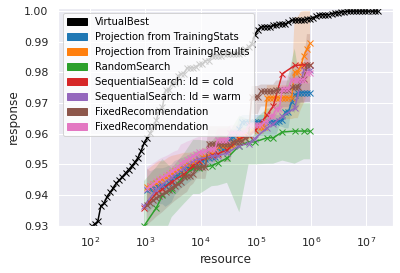

In [29]:
p = sb.plots.plot_performance()
ax = p.axes[0]
ax.set_ylim(0.93, 1.001)
p.show()
# keep pink static, cold start
# p.savefig('Performance.pdf')

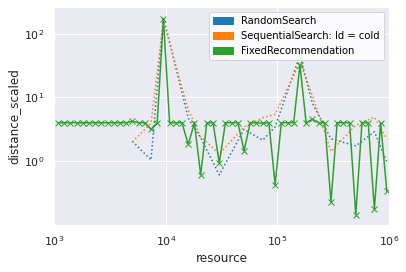

In [19]:
p = sb.plots.plot_parameters_distance()
ax = p.axes[0]
ax.set_yscale('log')
p.show()
# p.savefig('Parameters_distance.pdf')

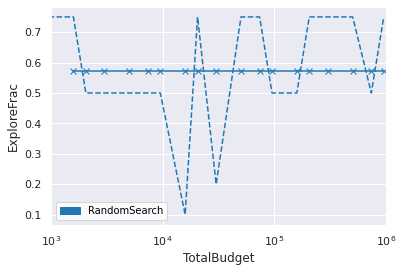

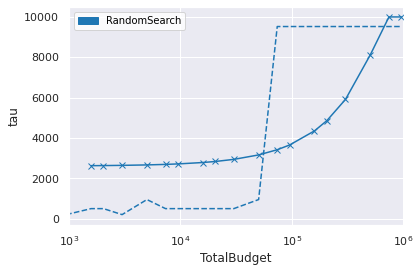

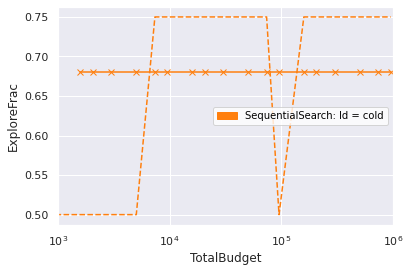

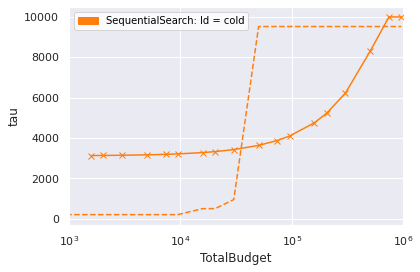

In [20]:
p_dict = sb.plots.plot_meta_parameters()
for experiment,v in p_dict.items():
    for param, p in v.items():
        # ax = p.axes[0]
        # ax.set_xscale('linear')
        if param == 'tau':
            ax = p.axes[0]
            # ax.set_yscale('log')
        p.show()
        #Tau on log scale, frac on linear, definitions for axis
        # p.savefig('{}_metaparameters={}.pdf'.format(experiment, param))
    

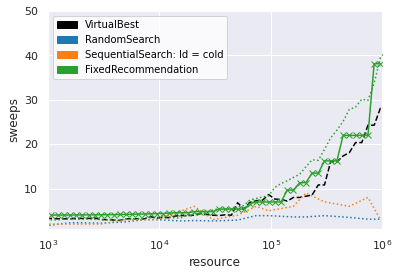

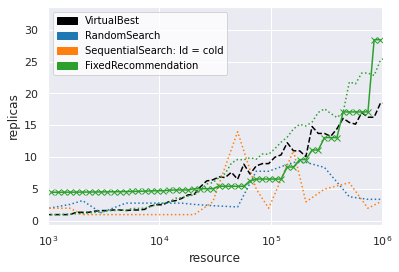

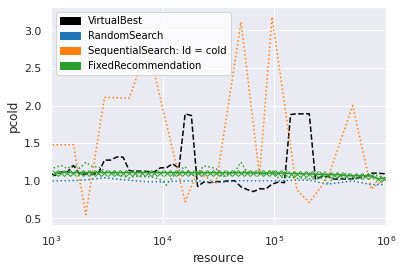

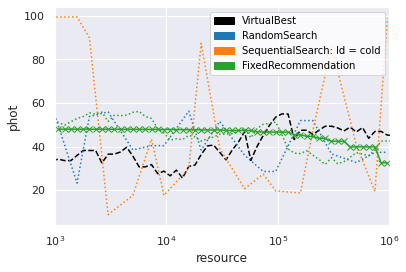

In [13]:
p_dict = sb.plots.plot_parameters()
for k, p in p_dict.items():
    ax = p.axes[0]
    if k == 'sweeps':
        # ax.plot(x, sweeps, '--')
        ax.set_ylim(1, 50)
        # ax.set_xscale('linear')
    # if k == 'replicas':
    #     ax.plot(x, replicas, '--')
    #     ax.set_ylim(0, 22)
    # if k == 'pcold':
    #     ax.plot(x, pcold, '--')
    # if k == 'phot':
    #     ax.plot(x, phot, '--')
    #     ax = p.axes[0]
    #     
    
    p.show()
    # p.savefig('Recommended_parameter={}_scale={}.pdf'.format(k, sb.plots.xscale))

In [33]:
for idx in [5, 6]:
    parameters_list = sb.experiments[idx].list_runs()
    params_array = np.array([[p[0], int(p[1]), int(p[2]), np.round(p[3], decimals=2),
        np.maximum(0.1, np.round(p[4], decimals=1))] for p in parameters_list])
    np.savetxt('rerun_params_{}.txt'.format(idx - 5), params_array)